# Helping Python Script - Gravity

### This Python script is only for inspriation, and you would need to change the parameters, load the a proper dataset, and do your own processing for it to be correct.

### For this script I use the module cartopy

In [1]:
#%% Modules
import numpy as np
import matplotlib.pyplot as plt

# The module cartopy is not part of the standard Python modules, and you would have to include it in your enviroment.
# there is other modules that can do similar to cartopy, feel free to use those insted if desired. 
import cartopy.crs as crs

# Other modules that can be helpfull to know off, scipy.fft are used in the functions "Gauss2Dconv_v1" and "griddata" is usefull later
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from scipy.interpolate import griddata


In [2]:
#%% Parameters

#%% For image plot
# Here I generate some random values. When a real dataset is loaded use that insted.
Images_random_values = np.random.rand(100,100)

latlon_area_of_interest = [-15, 40, 45, 70] # min-max of latitude and longitude for dataset
latlon_data_extend = [  4,  7, 54, 57] # min-max of latitude and longitude for the wanted area to see

#%% For scatter plot
scatter_random_values = np.array([np.random.uniform(low=latlon_data_extend[0], high=latlon_data_extend[1], size=(1000,)), 
                                  np.random.uniform(low=latlon_data_extend[2], high=latlon_data_extend[3], size=(1000,)), 
                                  np.random.rand(1000)]).T



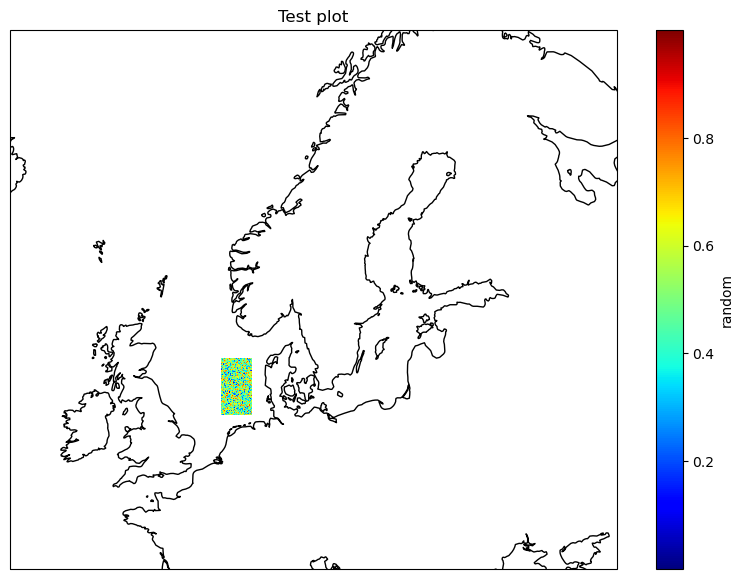

In [3]:
# Image plot
fig, axs = plt.subplots(1,1, figsize=(10, 7), 
                        sharex=True, sharey=True,
                        subplot_kw={'projection': crs.Mercator()})

axs.coastlines() # add costline
axs.set_extent(latlon_area_of_interest, crs=crs.PlateCarree()) # area of interest, this is the extend we see


im = axs.imshow(Images_random_values, 
            extent=latlon_data_extend, 
            origin='lower',
            cmap='jet',
            transform=crs.PlateCarree())

axs.set_title('Test plot')


h = plt.colorbar(im, ax=axs)
h.set_label('random')

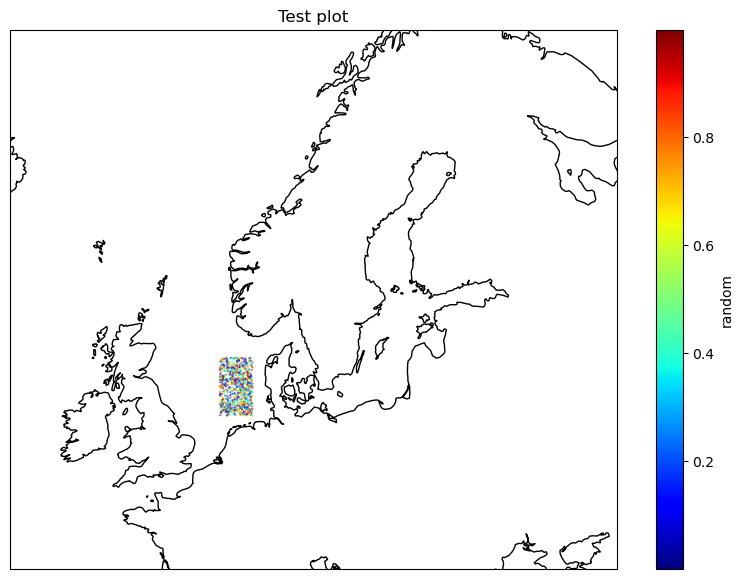

In [4]:
# scatter plot
fig, axs = plt.subplots(1,1, figsize=(10, 7), 
                        sharex=True, sharey=True,
                        subplot_kw={'projection': crs.Mercator()})

axs.coastlines() # add costline
axs.set_extent(latlon_area_of_interest, crs=crs.PlateCarree()) # area of interest, this is the extend we see


im = axs.scatter(x=scatter_random_values[:,0], y=scatter_random_values[:,1], c=scatter_random_values[:,2],
                 s=0.1, # size of dot
                 cmap='jet',
                 transform=crs.PlateCarree())

axs.set_title('Test plot')


h = plt.colorbar(im, ax=axs)
h.set_label('random')

### Some extra help:

#### - How to load "db.dat"
#### - How to use griddata
#### - How to include Python script and call function


In [5]:
#%% How to load "db.dat"

data = np.loadtxt("TYNGDE/db.dat")

# to acces columns 
Measurements_number = data[:,0]
Latitude = data[:,1]
Longitude = data[:,2]
Gravity = data[:,4]



In [6]:
# How to use griddata

grid_x, grid_y = np.mgrid[latlon_data_extend[0]:latlon_data_extend[1]:100j, latlon_data_extend[2]:latlon_data_extend[3]:100j]
grided_data = griddata(scatter_random_values[:,:2], scatter_random_values[:,2], (grid_x, grid_y), method='linear')

In [7]:
# How to include Python script and call function

# import function
from TYNGDE.Gauss2Dconv_v1 import Gauss2Dconv_v1

# call function
g_low, g_high = Gauss2Dconv_v1(grid_y, grid_x, grided_data, 1)
